In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='latin-1')

In [50]:
df.shape

(5572, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [52]:
df.head(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN


In [53]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [54]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


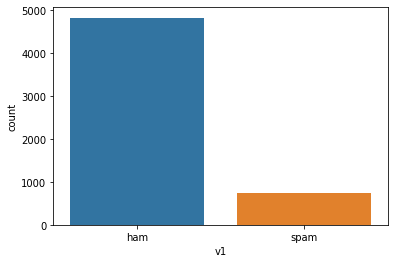

In [55]:
# using sns
sns.countplot(x=df['v1'],data=df)

In [56]:
count=df['v1'].value_counts()
print(count)

ham     4825
spam     747
Name: v1, dtype: int64


In [57]:
df['v1'] = df["v1"].map({'spam':1,'ham':0})

In [58]:
df['v1'].head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    1
Name: v1, dtype: int64

In [59]:
df.duplicated().sum()

403

In [60]:
df=df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [61]:
df['v2'] = df['v2'].str.lower() 

In [62]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
Lemmatizer=WordNetLemmatizer()
def work(word):
  word=Lemmatizer.lemmatize(word)
  return word
df['text']=df['v2'].apply(work)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [63]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
stop = stopwords.words('english')
df['texts'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
df.drop(['text'],axis=1,inplace=True)
df.drop(['v2'],axis=1,inplace=True)

In [65]:
df.head()

,v1,texts
0,0,"go jurong point, crazy.. available bugis n gre..."
1,0,ok lar... joking wif u oni...
2,1,free entry 2 wkly comp win fa cup final tkts 2...
3,0,u dun say early hor... u c already say...
4,0,"nah think goes usf, lives around though"


In [67]:
# for url
df["texts"] = df["texts"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()
# for special character 
df['texts'] = df['texts'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\{\}\+\%\!\/]", '')
# for number
df['texts'] = df['texts'].str.replace('\d+', '')

<ipython-input-67-ff637891435c>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["texts"] = df["texts"].str.replace(r'\s*https?://\S+(\s+|$)-;', ' ').str.strip()
<ipython-input-67-ff637891435c>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['texts'] = df['texts'].str.replace(r"[\"\'\|\?\=\.\;\#\*\-\,\?\:\{\}\+\%\!\/]", '')
<ipython-input-67-ff637891435c>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['texts'] = df['texts'].str.replace('\d+', '')


In [68]:
for i in range(50):
  print(df['texts'][i])

go jurong point crazy available bugis n great world la e buffet cine got amore wat
ok lar joking wif u oni
free entry  wkly comp win fa cup final tkts st may  text fa  receive entry question(std txt rate)t&cs apply overs
u dun say early hor u c already say
nah think goes usf lives around though
freemsg hey darling  weeks word back id like fun still tb ok xxx std chgs send å£ rcv
even brother like speak me treat like aids patent
per request melle melle (oru minnaminunginte nurungu vettam) set callertune callers press  copy friends callertune
winner valued network customer selected receivea å£ prize reward claim call  claim code kl valid  hours only
mobile  months more u r entitled update latest colour mobiles camera free call mobile update co free 
im gonna home soon want talk stuff anymore tonight k ive cried enough today
six chances win cash   pounds txt> csh send  cost pday days  tsandcs apply reply hl  info
urgent  week free membership å£ prize jackpot txt word claim no  t&c wwwdbuk

In [72]:
x=df.texts.values
y=df.v1.values

print(x)

['go jurong point crazy available bugis n great world la e buffet cine got amore wat'
 'ok lar joking wif u oni'
 'free entry  wkly comp win fa cup final tkts st may  text fa  receive entry question(std txt rate)t&cs apply overs'
 ... 'pity  mood that soany suggestions'
 'guy bitching acted like id interested buying something else next week gave us free'
 'rofl true name']


In [73]:
print(y)

[0 0 1 ... 0 0 0]


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(max_features=5000,ngram_range=(1,3))

In [75]:
x_process=vectorizer.fit_transform(df['texts']).toarray()

In [76]:
x_process

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [78]:
x_process.shape

(5169, 5000)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_process,y,test_size=0.2,random_state=42)

In [80]:
# Model Building

from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print('GaussianNB')
print('accuracy_score',accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print('precision_score',precision_score(y_test,y_pred))
print('---------------')
print('MultinomialNB')
mnb.fit(X_train,y_train)
y_pred_2=mnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_2))
print(confusion_matrix(y_test,y_pred_2))
print('precision_score',precision_score(y_test,y_pred_2))
print('---------------')
print('BernoulliNB')
bnb.fit(X_train,y_train)
y_pred_3=bnb.predict(X_test)
print('accuracy_score',accuracy_score(y_test,y_pred_3))
print(confusion_matrix(y_test,y_pred_3))
print('precision_score',precision_score(y_test,y_pred_3))

GaussianNB
accuracy_score 0.9158607350096711
[[817  72]
 [ 15 130]]
precision_score 0.6435643564356436
---------------
MultinomialNB
accuracy_score 0.9806576402321083
[[882   7]
 [ 13 132]]
precision_score 0.9496402877697842
---------------
BernoulliNB
accuracy_score 0.9709864603481625
[[889   0]
 [ 30 115]]
precision_score 1.0
